# Probability-insighter
https://github.com/alvason/probability-insighter

Gaussian random distribution (standard normal distribution)

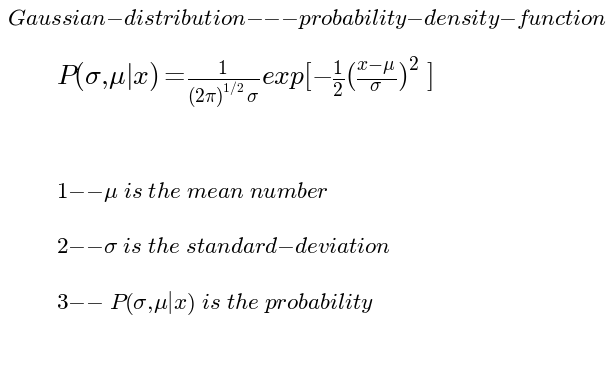

In [1]:
'''
author: Alvason Zhenhua Li
date:   03/19/2015
'''

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
dir_path = '/Users/al/Desktop/GitHub/probability-insighter/figure'
file_name = 'gaussian-distribution'

import alva_machinery_probability as alva

AlvaFontSize = 23
AlvaFigSize = (16, 7)
numberingFig = 0

# plotting
figure_name = '-equation'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(9, 6))
plt.axis('off')
plt.title(r'$ Gaussian-distribution---probability-density-function $',fontsize = AlvaFontSize)
plt.text(0, 5.0/6, r'$ P(\sigma, \mu|x) = \frac{1}{(2\pi)^{1/2}\sigma} exp[-\frac{1}{2}(\frac{x - \mu}{\sigma})^2] $',
         fontsize = 1.2*AlvaFontSize)
plt.text(0, 3.0/6, r'$ 1-- \mu \ is \ the \ mean \ number $',
         fontsize = AlvaFontSize)
plt.text(0, 2.0/6, r'$ 2-- \sigma \ is \ the \ standard-deviation \  $', fontsize = AlvaFontSize)
plt.text(0, 1.0/6, r'$ 3-- \ P(\sigma, \mu|x) \ is \ the \ probability  $',
         fontsize = AlvaFontSize)
plt.savefig(save_figure, dpi = 300)
plt.show()

total-probability = 1.41421356237


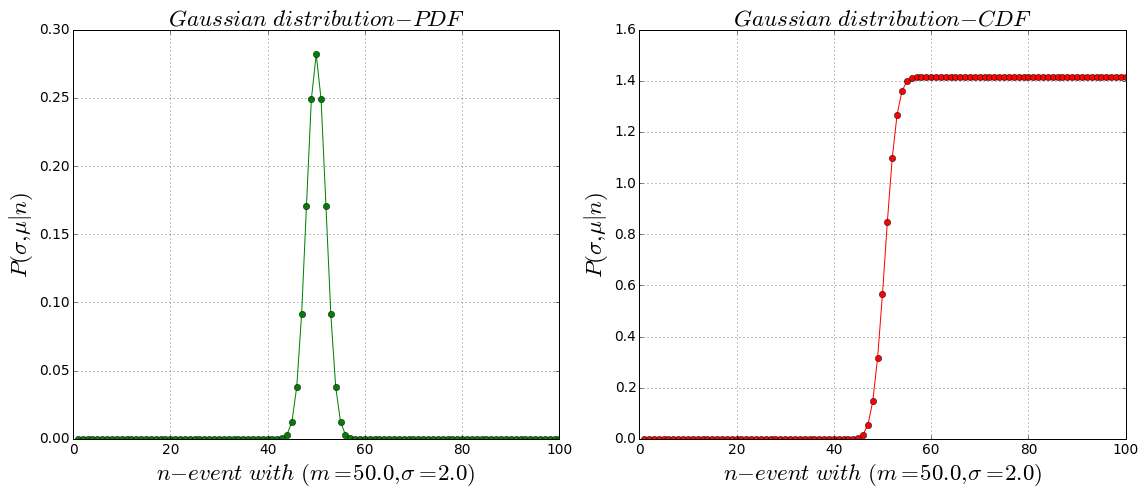

In [18]:
def AlvaGaussianD(i, meanP, deviationP):
    G_distribution = 0.0*i
    G_distribution[:] = (1.0/(2*np.pi*deviationP)**(1.0/2)) * np.exp(-(1.0/2)*((i[:] - meanP)/deviationP)**2)
    return (G_distribution)

def AlvaGaussianC(m, meanP, deviationP, gaussianD):
    B_C = 0.0*m
    for j in range(np.size(m)):
        for k in range(m[j]):
            i = np.arange(k + 1)
            B_distribution = gaussianD(i, meanP, deviationP)
        B_C[j] = B_C[j] + B_distribution.sum()
    return (B_C)

total_event = int(100)
i_event = np.arange(1, total_event + 1)
totalPoint_Input = total_event
meanP = total_event/2.0
deviationP = 2.0

gaussian_D = AlvaGaussianD(i_event, meanP, deviationP)

print ('total-probability = {:}'.format(gaussian_D.sum()))
# plotting1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(i_event, gaussian_D, marker ='o', color = 'green')
if totalPoint_Input < 100:
    plot1.set_xticks(i_event, minor = True) 
    plot1.set_yticks(gaussian_D, minor = True) 
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Gaussian \ distribution-PDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ (m = {:}, \sigma = {:}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(\sigma, \mu|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

# plotting2
i_event = np.arange(1, total_event + 1)
gaussian_C = AlvaGaussianC(i_event, meanP, deviationP, AlvaGaussianD)
plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(i_event, gaussian_C, marker ='o', color = 'red')
if totalPoint_Input < 100:
    plot2.set_xticks(i_event, minor = True) 
    plot2.set_yticks(gaussian_C, minor = True) 
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Gaussian \ distribution-CDF $', fontsize = AlvaFontSize)
plt.xlabel(r'$ n-event \ with \ (m = {:}, \sigma = {:}) $'.format(meanP, deviationP), fontsize = AlvaFontSize)
plt.ylabel(r'$ P(\sigma, \mu|n) $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 

figure.tight_layout()
plt.show()

max-events/level = 35.0


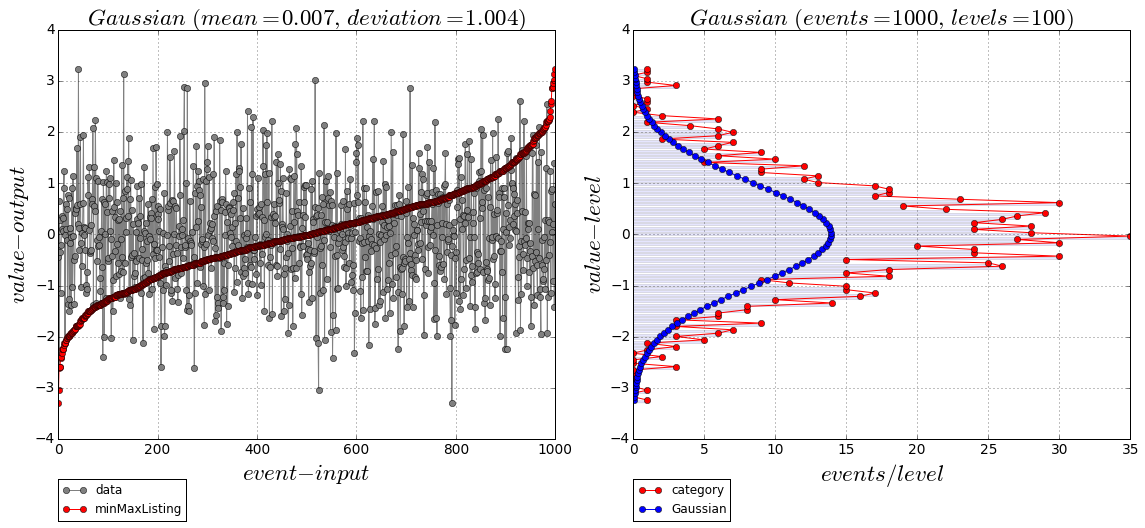

In [15]:
'''Gaussian randomness --- Gaussian distribution --- Standard normal distribution'''

total_event = int(1000)
gInput = np.arange(total_event)
randomSeed = np.random.standard_normal(total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + randomSeed[i]
meanP = sumP/(total_event)

sumP = 0
for i in range(total_event):
    sumP = sumP + (meanP - randomSeed[i])**2
deviationP = (sumP/total_event)**(1.0/2)

totalLevel = int(total_event/10)
category = alva.AlvaLevel(randomSeed, totalLevel, False)
gLevel = category[0]
numberLevel = category[1]

maxEvent_per_level = alva.AlvaMinMax(numberLevel)[-1]
print ('max-events/level = {:}'.format(maxEvent_per_level))
gaussian_D = maxEvent_per_level * AlvaGaussianD(gLevel, meanP, deviationP)

# plotting
figure_name = ''
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
figure = plt.figure(numberingFig, figsize = AlvaFigSize)
plot1 = figure.add_subplot(1, 2, 1)
plot1.plot(gInput, randomSeed, color = 'gray', marker = 'o', label = 'data')
plot1.plot(gInput, alva.AlvaMinMax(randomSeed), color = 'red', marker = 'o', label = 'minMaxListing')
if total_event < 100:
    plot1.set_xticks(gInput, minor = True) 
    plot1.set_yticks(randomSeed, minor = True)
    plot1.grid(True, which = 'minor')
else:
    plot1.grid(True, which = 'major')
plt.title(r'$ Gaussian \ (mean = {:1.3f},\ deviation = {:1.3f}) $'.format(meanP, deviationP),
          fontsize = AlvaFontSize)
plt.xlabel(r'$ event-input $', fontsize = AlvaFontSize)
plt.ylabel(r'$ value-output $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

plot2 = figure.add_subplot(1, 2, 2)
plot2.plot(numberLevel, gLevel, color = 'red', marker = 'o', label = 'category')
plot2.plot(gaussian_D, gLevel, color = 'blue', marker = 'o', label = 'Gaussian') 
plot2.hist(randomSeed, bins = totalLevel, alpha = 0.1, orientation = 'horizontal', rwidth = 0.6)
if total_event < 100:
    plot2.set_xticks(numberLevel, minor = True) 
    plot2.set_yticks(gLevel, minor = True)
    plot2.grid(True, which = 'minor')
else:
    plot2.grid(True, which = 'major')
plt.title(r'$ Gaussian \ (events = {:},\ levels = {:}) $'.format(total_event, totalLevel)
          , fontsize = AlvaFontSize)
plt.xlabel(r'$ events/level $', fontsize = AlvaFontSize)
plt.ylabel(r'$ value-level $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.legend(loc = (0, -0.2))

figure.tight_layout()
plt.savefig(save_figure, dpi = 300)
plt.show()

In [4]:
def AlvaIntegrateArea(out_i, min_i, max_i, totalGPoint_i):
    spacing_i = np.linspace(min_i, max_i, num = totalGPoint_i, retstep = True)
    grid_i = spacing_i[0]
    dx = spacing_i[1]
    outArea = np.sum(out_i(grid_i[:]))*dx
    return (outArea)

def gaussianA(i):
    inOut = np.exp(-i**2)
    return (inOut)

ggg = AlvaIntegrateArea(gaussianA, -10, 10, 100)
print ggg
ppp = (np.pi)**(1.0/2)
print ppp


1.77245385091
1.77245385091
